# Сборный проект

# Содержание
[Описание проекта](#description),
1. [Описание данных](#1),
2. [Общая информация по файлу](#2),
3. [Подготовка данных ](#3),
4. [Исследовательский анализ данных](#4),
5. [Портрет пользователя каждого региона ](#5),
6. [Проверка гипотез ](#6),
* [Общий вывод](#7),   


## Описание проекта <a id='description'></a>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных <a id='1'></a>

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация по файлу <a id='2'></a>

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/games.csv')
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица содержит 11 столбцов и 16715 строк. В данных имеются пропуски.

## Подготовка данных <a id='3'></a>

* замена названий столбцов (приведение к нижнему регистру)

In [4]:
df.columns = df.columns.str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


* обработка пропусков

Пропущено два значения в названии игр, избавлюсь от этих строк, так как восстановить их сложно.

In [5]:
df = df.dropna(subset = ['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
#Посмотрю какой процент пропусков в году выпуска
df['year_of_release'].isnull().mean()

0.016095255190570215

Пропущено примерно 1.6% значений, избавлюсь от них.

In [7]:
df = df.dropna(subset = ['year_of_release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
#В рейтинге пользователей tbd заменю на пропуск, так как рейтинг еще не выставлен
df['user_score'].replace('tbd', np.nan, inplace = True)

In [9]:
df['rating'] = df['rating'].fillna('RP') # заменю пустые значения на значение RP (еще без оценки)

Строки с пропусками в названии и годе выпуска были удалены. Пропуски в рейтинге критиков, пользователей и возрастном рейтинге оставлю без изменений, так как восстановить эти значения будет сложно и их много чтобы удалить.

* замена типов

In [10]:
#год релиза заменю на целочисленный
df['year_of_release'] = df['year_of_release'].astype(int)
df['user_score'] = df['user_score'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


* добавлю новый столбец, в котором будет суммарная продажа во всех регионах

In [11]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


# Исследовательский анализ данных <a id='4'></a>

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

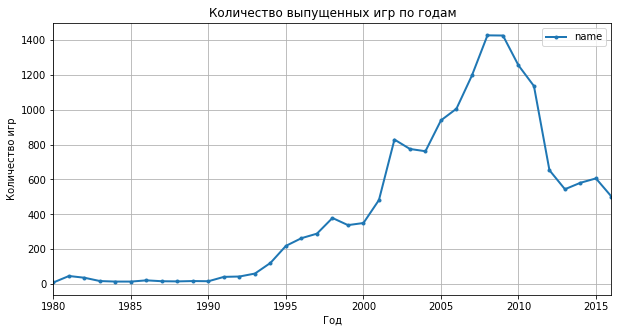

In [12]:
df.pivot_table(index = 'year_of_release', 
               values = 'name', 
               aggfunc = 'count').plot(style = '.-',
                                       kind = 'line', 
                                       fontsize = 10,
                                       linewidth = 2, 
                                       figsize = (10, 5), 
                                       grid = True).set_title('Количество выпущенных игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год')
plt.show()

In [13]:
#Удалю маленькие выборки игр до 1990 года
df = df.query('year_of_release > 1990')

Число выпускаемых игр в год росло с 1980 до 2008, с 2010 года началось падение числа выпускаемых игр.

* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [14]:
#функция глобальных продаж по платформам
def total_sales(df):
    return (
    df.pivot_table(index = 'platform',
                  values = 'sum_sales',
                  aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False)
    )

In [15]:
#функция по годам
def year_total_sales(name, df):
    return(
    df.query('platform == @name').pivot_table(index = 'year_of_release',
                                             values = 'sum_sales',
                                             aggfunc = 'sum').sort_values('year_of_release',
                                                                         ascending = False)
    )

In [16]:
sales = total_sales(df)
sales

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


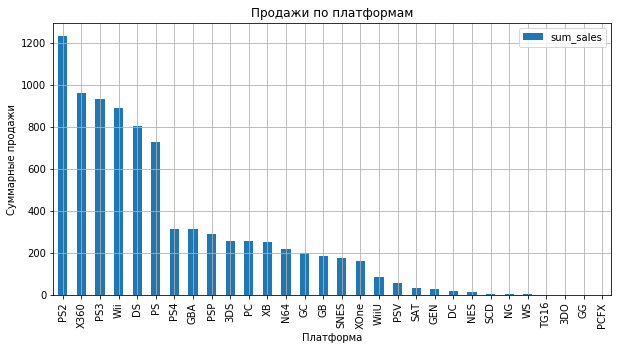

In [17]:
sales.plot(kind = 'bar',
          fontsize = 10,
          figsize = (10, 5),
          grid = True).set_title('Продажи по платформам')
plt.ylabel('Суммарные продажи')
plt.xlabel('Платформа')
plt.show()

Выберу первые 5 платформ с наибольшими глобальными продажами.

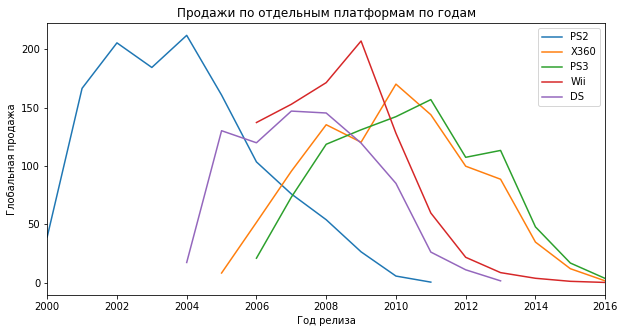

In [18]:
list_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

for row in list_platform:
    year_total_sales(row, df)['sum_sales'].plot(figsize = (10, 5), label = row).set_title('Продажи по отдельным платформам по годам')
    plt.xlabel('Год релиза')
    plt.ylabel('Глобальная продажа')
    plt.legend()

Видно, что разные платформы были выпущены в разное время. Среднее время актуальности платформы 6-10 лет. Продажи самых популярных платформ спадают к 2016 году.

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Оставлю период с 2006 по 2016 год, является конечным на данный момент развития игровой индустрии.

In [19]:
df = df.query('year_of_release >= 2014')
df_actual = total_sales(df)
df_actual

,sum_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


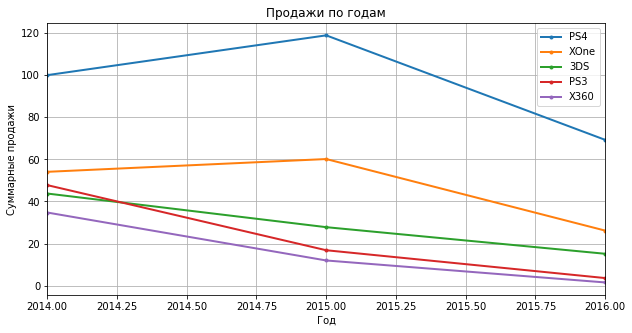

In [20]:
platforms = ['PS4', 'XOne', '3DS', 'PS3', 'X360']

for i in platforms:
    year_total_sales(i, df)['sum_sales'].plot(x='year_of_release',
                                        y='all_sales',
                                        label = 'platform',
                                        style='.-',
                                        kind ='line',
                                        fontsize=10,
                                        linewidth=2,
                                        figsize=(10,5),
                                        grid = True).set_title('Продажи по годам')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend(platforms)

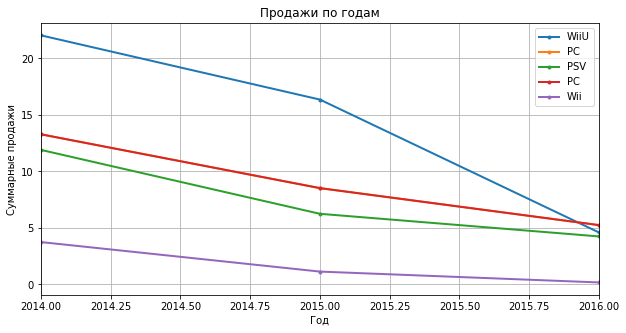

In [21]:
#Рассмотрю другие платформы
platforms = ['WiiU', 'PC', 'PSV', 'PC', 'Wii']

for i in platforms:
    year_total_sales(i, df)['sum_sales'].plot(x='year_of_release',
                                        y='all_sales',
                                        label = 'platform',
                                        style='.-',
                                        kind ='line',
                                        fontsize=10,
                                        linewidth=2,
                                        figsize=(10,5),
                                        grid = True).set_title('Продажи по годам')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend(platforms)

К 2016 году продажи игр на всех платформах падают. Из перспективных консолей нового поколения XOne ~ 25 млн, PS4 ~ 75 млн. Эти платформы рассмотрю детальнее.

* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

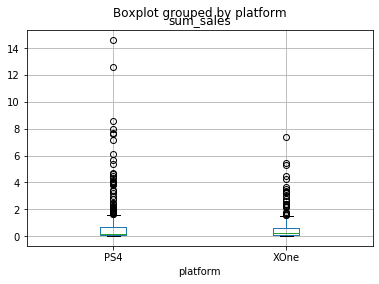

In [22]:
import warnings

warnings.filterwarnings('ignore')

platforms = ['XOne', 'PS4']
df.query('platform in @platforms').boxplot(by = 'platform', column = 'sum_sales')

Средняя продажа каждой игры на платформах XOne и PS4 примерно одинакова, однако наблюдаются выбросы в большую сторону у PS4(скорее всего это популярные эксклюзивы платформы PS4).

* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [23]:
ps4 = df.query('platform == "PS4"')
xone = df.query('platform == "XOne"')
columns = ['user_score', 'critic_score', 'sum_sales']

ps4[columns].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
sum_sales,-0.040132,0.402661,1.000000


In [24]:
xone[columns].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.440977,-0.070384
critic_score,0.440977,1.000000,0.428677
sum_sales,-0.070384,0.428677,1.000000


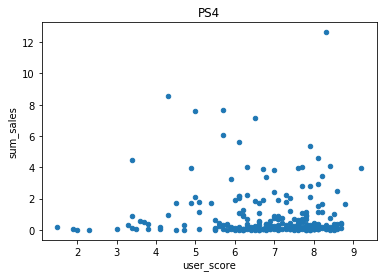

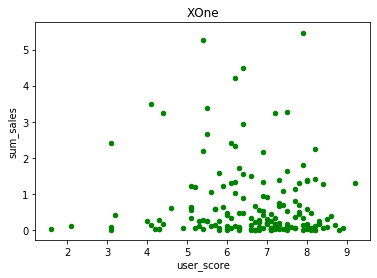

In [25]:
ps4.plot(x = 'user_score',
        y = 'sum_sales',
        kind = 'scatter',
        title = 'PS4')
xone.plot(x = 'user_score',
        y = 'sum_sales',
        kind = 'scatter',
        title = 'XOne',
         color = 'g')
plt.show()

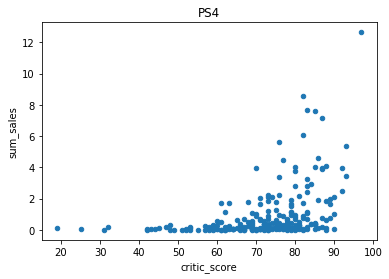

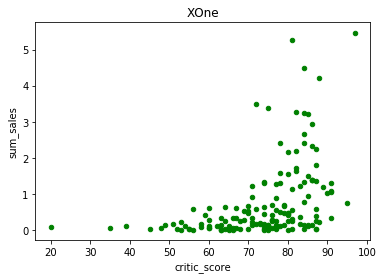

In [26]:
ps4.plot(x = 'critic_score',
        y = 'sum_sales',
        kind = 'scatter',
        title = 'PS4')
xone.plot(x = 'critic_score',
        y = 'sum_sales',
        kind = 'scatter',
        title = 'XOne',
         color = 'g')
plt.show()

Взаимосвязь между отзывами пользователей и продажи нет. Взаимосвязь между критиками и продажи, не слишком большая. Корреляция не говорит о причинно-следственной связи. Из диаграмм рассеяния видно, чем выше оценки критики, тем больше продажи игр.

* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

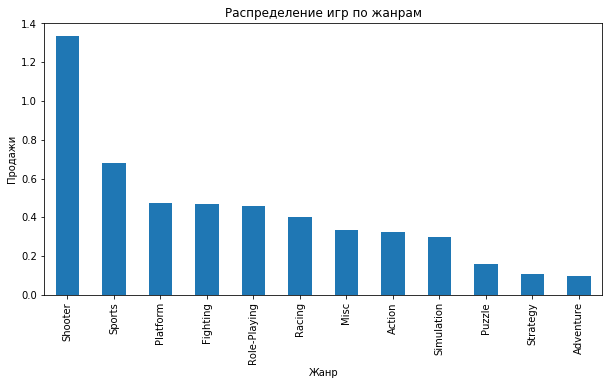

In [27]:
(df
 .pivot_table(index = 'genre', values = 'sum_sales')
 .sort_values('sum_sales', ascending = False)
 .plot(kind = 'bar', y = 'sum_sales', 
       title = 'Распределение игр по жанрам', figsize = (10, 5), 
       legend = False)
 .set(xlabel = 'Жанр', ylabel = 'Продажи')
)
plt.show()

Самым популярным ханром является шутер. Хуже всего продаются стратегии и квесты.

### Портрет пользователя каждого региона <a id='5'></a>

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### NA

In [28]:
region = 'na_sales'
def top5(column):
    return (
        df
        .pivot_table(index = column, values = region, aggfunc = 'sum')
        .sort_values(region, ascending = False)
        .head(5)    
    )

In [29]:
def sales_graf(df):
    (
        df
        .plot(kind = 'pie', y = region, title = region, autopct='%1.0f%%', figsize = (10, 5), legend = False)
        .set(ylabel = 'Продажи')
    )
    plt.show()

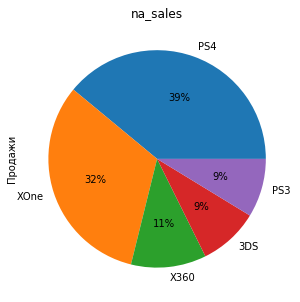

In [30]:
#Самые популярные платформы
sales_graf(top5('platform'))

В США более популярны PS и XBOX.

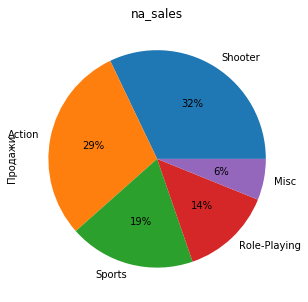

In [31]:
#Самые популярные жанры
sales_graf(top5('genre'))

Экшены и шутеры - самые популярные жанры.

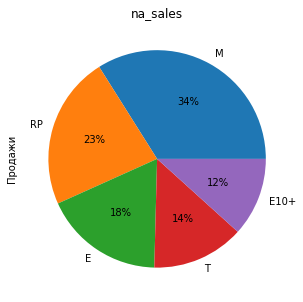

In [32]:
#Влияние рейтинга на продажи
sales_graf(top5('rating'))

Большая доля игр приходится для взрослой аудитории (17+)

### EU 

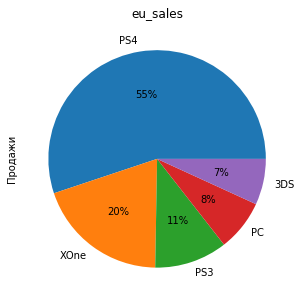

In [33]:
region = 'eu_sales'
#Самые популярные платформы
sales_graf(top5('platform'))

В Европе более популярна PlayStation.

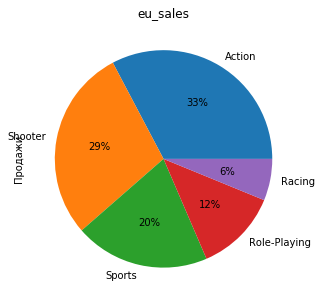

In [34]:
#Самые популярные жанры
sales_graf(top5('genre'))

Экшены и шутеры – все также самые популярные жанры.

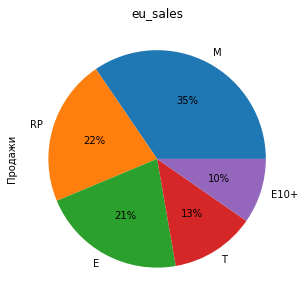

In [35]:
#Влияние рейтинга на продажи
sales_graf(top5('rating'))

В Европе также большим спросом пользуются игры для взрослых (17+)

### JP 

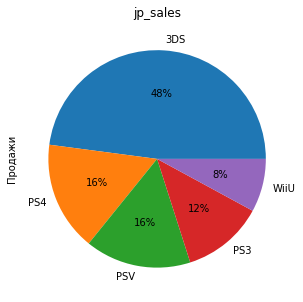

In [36]:
region = 'jp_sales'
#Самые популярные платформы
sales_graf(top5('platform'))

Японцы много играют на портативных консолях типа Nintento (3)DS, PSP и пр.

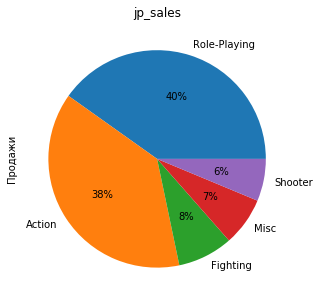

In [37]:
#Самые популярные жанры
sales_graf(top5('genre'))

Ролевые игры являются самыми популярными.

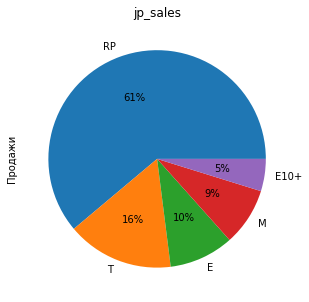

In [38]:
#Влияние рейтинга на продажи
sales_graf(top5('rating'))

В Японии ситуация изменилась, популярен рейтинг для лиц от 13 лет. Большая часть не имеет рейтинга. 

В США и Европе лучше всего продаются экшены и шутеры. В Японии большей популярностью пользуется жанр ролевых игр, жанр экшен так же популярен. Везде самые популярные игры для 17+ и подростков.

### Проверка гипотез <a id='6'></a>

####  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза H₀:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁:
* Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Разница между дисперсиями выборок состовляет 0,33, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [39]:
alpha = 0.025

pc = df.query('platform == "PC"')

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var = False, #t-test, который не предполагает равенство дисперсий
    nan_policy = 'omit'
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668985
Не получилось отвергнуть нулевую гипотезу


In [40]:
pc['user_score'].describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [41]:
xone['user_score'].describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

Гипотеза средние пользовательские рейтинги платформ XBOX One и PC одинаковые подтвердилась.

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀:

* Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁:

* Средние пользовательские рейтинги жанров Action и Sports различаются.

Разница между дисперсиями выборок состовляет 1,55, что при данном уровне дисперсии довольно большая разница и считать дисперсии выборок равными нельзя, поэтому зададим аргумент equal_var=False.

In [42]:
action = df.query('genre == "Action"')
sports = df.query('genre == "Sports"')

action_ttest_var = np.var(action['user_score'], ddof=1)
sports_ttest_var = np.var(sports['user_score'], ddof=1)

print('Дисперсия жанра Action:', round(action_ttest_var, 2))
print('Дисперсия жанра Sports:', round(sports_ttest_var, 2))

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    equal_var = False, #t-test, который не предполагает равенство дисперсий
    nan_policy = 'omit'
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсия жанра Action: 1.9
Дисперсия жанра Sports: 3.45
p-значение: 1.1825550382644845e-14
Отвергаем нулевую гипотезу


Гипотеза средние пользовательские рейтинги жанров Action и Sports разные подтвердилась.

### Вывод  <a id='7'></a>

Число выпускаемых игр в год росло с 1980 до 2008, с 2010 года началось падение числа выпускаемых игр. Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. В США и Европе лучше всего продаются шутеры и экшены.
Обе сформулированные гипотезы подтвердились:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action и Sports разные.